In [1]:
# Shiyi (Amy) Qin and Victor Z
# UW-Madison, 2024
# PCA analysis of gibbs reactor

## Start here if working on google collab

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [4]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [5]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
# Load the datasets
datahigh = np.loadtxt(path+'Data/gibbs_hightemp_class.dat')
datalow = np.loadtxt(path+'Data/gibbs_lowtemp_class.dat')
data = np.vstack((datahigh, datalow))
datan = data
n = len(datan)

In [8]:
# Corrupt data with noise to hide pattern
np.random.seed(1)  # For reproducibility
x1 = datan[:, 1] + np.random.randn(n) * 0.1  # pressure
x2 = datan[:, 2] + np.random.randn(n) * 0.1  # conversion
y = datan[:, 0] + np.random.randn(n) * 0.1   # temperature
X = np.column_stack((y, x1, x2))

In [9]:
# Perform PCA
pca = PCA()
score = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

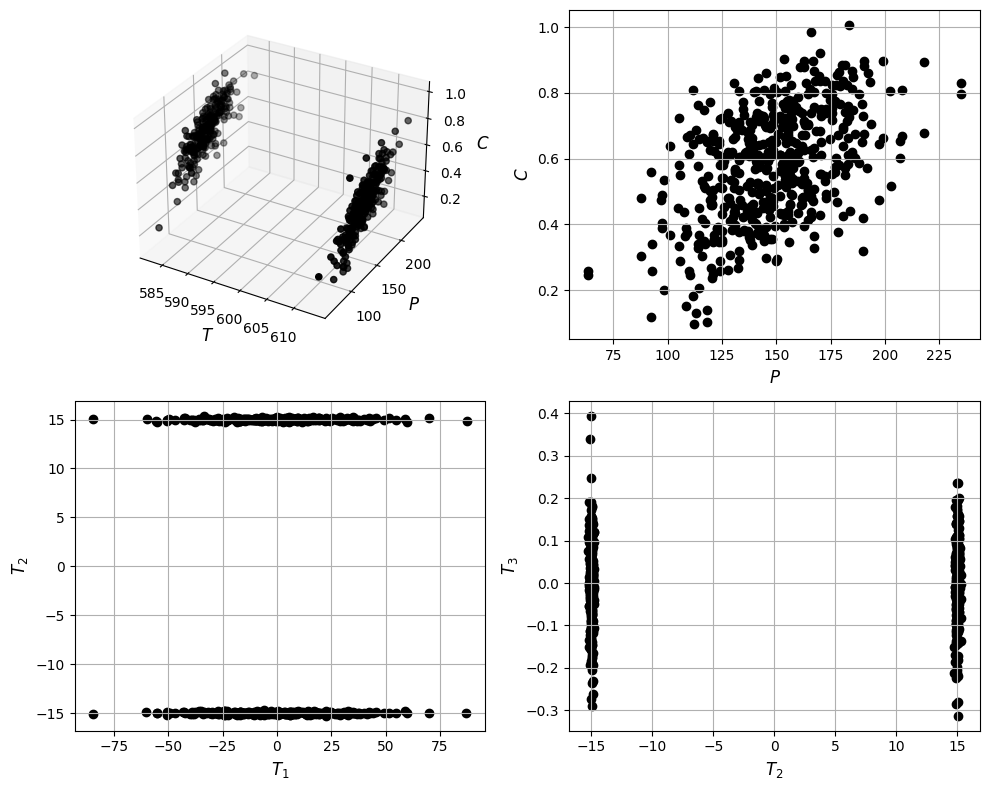

In [10]:
# Visualize the data in 3D (the clusters reveal)
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='black', marker='o')
ax.set_xlabel('$T$', fontsize=12)
ax.set_ylabel('$P$', fontsize=12)
ax.set_zlabel('$C$', fontsize=12)
ax.grid(True)

# Visualize the data in 2D (the clusters are hidden)
ax = fig.add_subplot(222)
ax.scatter(x1, x2, c='black', marker='o')
ax.set_xlabel('$P$', fontsize=12)
ax.set_ylabel('$C$', fontsize=12)
ax.grid(True)

# Visualize PCA results
ax = fig.add_subplot(223)
ax.scatter(score[:, 0], score[:, 1], c='black', marker='o')
ax.set_xlabel('$T_1$', fontsize=12)
ax.set_ylabel('$T_2$', fontsize=12)
ax.grid(True)

ax = fig.add_subplot(224)
ax.scatter(score[:, 1], score[:, 2], c='black', marker='o')
ax.set_xlabel('$T_2$', fontsize=12)
ax.set_ylabel('$T_3$', fontsize=12)
ax.grid(True)

plt.tight_layout()